# A comprehensive analysis on job descriptions data with a job recommendation system based on skillset.



The Job descriptions dataset contains detailed job descriptions, qualifications, locations, and other related attributes to perform an in-depth analysis of the job market across various regions. 
Focusing specifically on the IT and data-related job sectors, this project seeks to extract valuable insights regarding job requirements, preferred qualifications, and employment trends. Utilizing PySpark for robust big data processing, the analysis delves into the characteristics of job listings, highlighting trends in experience and salary expectations, as well as geographical distributions of job opportunities. Visualization tools such as Matplotlib and Seaborn are employed to present the data in a clear and engaging manner, making it easier to identify and understand the key patterns and insights derived from the job data.

### Motivation
The technology sector is rapidly evolving, with new roles, technologies, and required skills emerging constantly. Understanding these changes can help educators, policymakers, and businesses adapt to meet the growing and changing demands of the industry.

**Skill Gap Analysis:** Identifying the discrepancies between the skills that employers need and those that job seekers offer can help educational institutions and training programs tailor their curricula to better prepare students for the workforce.

**Economic Development:** Insights from job market trends can guide regional and national economic development strategies by indicating where to focus investments in education, training, and infrastructure to support and expand the technology sector.

**Recruitment Efficiency:** For companies and HR professionals, understanding detailed job market trends can enhance recruitment strategies, allowing for more precise targeting and efficient hiring processes. This leads to better matches between job roles and candidate skills.

**Career Planning and Development:** Individuals can use insights from this analysis to make informed decisions about their education and career paths. Knowing which skills are in demand and which roles are growing can guide professionals in focusing their development efforts to align with market needs.

**Business Strategy and Competitive Advantage:** Companies can leverage job market analysis to align their strategic planning with current and future talent needs. This ensures they maintain a competitive edge by acquiring and developing talent that matches the evolving demands of the technology sector.

### Key Objectives and Scope of Analysis 

**Data Quality Enhancement**: Clean and preprocess the data to ensure accuracy and reliability for analysis, including handling null values and decomposing complex fields into more analytically useful components.

**Job Market Analysis:** Conduct detailed exploratory analysis on job roles, focusing on extracting patterns related to qualifications, experience requirements, and salary ranges, particularly within the tech and big data sectors.

**Geographical Trends:** Analyze the distribution of job opportunities across different regions, with a specific focus on the United States, to understand regional employment dynamics and opportunities.

**Sector-specific Trends:** Deep dive into the big data and tech industries' job listings to identify specific skills and qualifications that are most in demand and how they vary by company size and location.

**Job recommendation System** Recommendation of jobs using skillset


### Findings

The findings from this analysis and machine learning applications will contribute valuable insights to Job seekers and educationalists. Job seekers can look at he trends in the market and sector and plan their career for the future. The Job recommendation system can help them choose the job based on the available skillset. Educationalists can understand the trends and requirements of the industry in planning the curriculam of the educational institutions.


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,when,sum,current_date
from pyspark.sql.functions import *
from datetime import datetime, timedelta
from pyspark.sql.window import Window
from pyspark.sql.types import *
from pyspark.sql import HiveContext
import pytz
from delta.tables import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
spark = SparkSession.builder.appName("explore-job-descriptions-data").config("spark.some.config.option", "some-value").getOrCreate()
spark.sparkContext.setLogLevel("WARN")

### Data Loading

In [0]:
job = spark.read.format('csv').option('inferSchema', 'true').option('header', 'true').load('dbfs:/FileStore/tables/job_updated.csv')
# display(job)

In [0]:
# Checking the Schema of the data
job.printSchema()

root
 |-- Job Id: string (nullable = true)
 |-- Experience: string (nullable = true)
 |-- Qualifications: string (nullable = true)
 |-- Salary Range: string (nullable = true)
 |-- location: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- Work Type: string (nullable = true)
 |-- Company Size: string (nullable = true)
 |-- Job Posting Date: string (nullable = true)
 |-- Preference: string (nullable = true)
 |-- Contact Person: string (nullable = true)
 |-- Contact: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Role: string (nullable = true)
 |-- Job Portal: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Benefits: string (nullable = true)
 |-- skills: string (nullable = true)
 |-- Responsibilities: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Company Profile: string (nullable = true)
 |-- Sector: string (nullab

**Job Id:** A unique identifier for each job posting.
- Usage: Used to uniquely identify and reference each job entry in the dataset.

**Experience:** The range of years of experience required for the job.
- Usage: Helps in filtering job candidates based on their professional experience.

**Qualifications:** The educational or professional qualifications required for the job.
- Usage: Crucial for screening applicants to ensure they meet the educational standards needed for the position.

**Salary Range:** The compensation range offered for the job.
- Usage: Provides potential applicants with an expectation of salary and helps in comparing compensation across different job listings.

**Location:** The city or town where the job is located.
- Usage: Useful for candidates considering job opportunities based on geographical preferences.

**Country:** The country where the job is based.
- Usage: Important for understanding the global distribution of job opportunities and for legal and logistical considerations.

**Latitude and Longitude:** Geographical coordinates of the job location.
- Usage: Enables mapping and spatial analysis of job locations to visualize and analyze geographical trends and distributions.

**Work Type:** The nature of the employment contract, such as Part-Time, Full-Time, or Contract.
- Usage: Helps candidates understand the commitment level and nature of the job contract.

**Company Size:** The number of employees in the company offering the job.
- Usage: Provides insight into the scale of the company, which can influence a candidate's decision based on their preference for working in smaller or larger organizations.

**Job Posting Date:** The date when the job was posted.
- Usage: Useful for tracking the freshness of the job posting and for analyzing hiring trends over time.

**Preference:** Indicates if the job has a gender preference or is open to all.
- Usage: Important for diversity and inclusion analysis, and understanding recruitment practices.

**Contact Person:** The name of the person to contact for this job.
- Usage: Provides a direct contact for potential applicants, making the application process more personalized.

**Contact:** The contact details for the job, often a phone number.
- Usage: Essential for applicants to reach out for further inquiries or to apply for the job directly.

**Job Title:** The title of the job position.
- Usage: Helps in identifying the role and is crucial for job seekers searching for specific positions.

**Role:** Describes the broader category or function of the job within the organization.
- Usage: Assists in classifying jobs into categories for organizational and analytical purposes.

**Job Portal:** The online platform where the job was posted.
- Usage: Useful tracking the effectiveness of different job portals in attracting candidates.

**Job Description:** A detailed description of the job responsibilities and requirements.
- Usage: Crucial for candidates to understand what is expected in the role and decide if they are a good fit.

**Benefits:** Additional perks offered with the job, such as healthcare, bonuses, etc.
- Usage: Acts as an incentive for potential applicants and can differentiate a job posting from others.

**Skills:** Specific skills required for the job.
- Usage: Helps in filtering candidates who possess the necessary technical or soft skills for the role.

**Responsibilities:** Key duties and responsibilities associated with the job.
- Usage: Provides clear expectations for applicants on what the job entails on a day-to-day basis.

**Company:** The name of the company offering the job.
- Usage: Important for candidates who are particular about the companies they wish to work for.

**Company Profile:** A brief description of the company, including key information like sector, industry, location, etc.
- Usage: Helps candidates learn more about the company’s background and its operational context.

**Sector:** The segment of the economy in which the company operates.
- Usage: Useful for understanding the industry dynamics and for economic analysis.

**Industry:** A more specific category within the sector describing the company’s primary area of business.
- Usage: Helps in understanding the specific field the company specializes in, which is crucial for job seekers looking for industry-specific roles.

**City, State, Zip:** Detailed address information for the company.
- Usage: Essential for logistical planning and understanding the precise location of the company.

**Website:** The company’s website URL.
- Usage: Allows candidates and other interested parties to seek more information directly from the company’s official online resource.

**Ticker:** The stock ticker symbol of the company if publicly traded.
- Usage: Useful for financial analysis and understanding the market perception of the company.

# Data Cleaning

#### Removing nulls

In [0]:
job_cleaned = job.na.drop()
display(job_cleaned)

In [0]:
# Count of records after removing nulls,
# UX/UI, Data, IT, Business Analyst, Web, Java, Network, Software
job_cleaned.count()

648354

#### Cleaning column values to make them ready for analysis

In [0]:
## Splitting experience column into minimum expereince and maximum experience
ex_split  = job_cleaned.withColumn("experiences", split(job["Experience"], " "))
ex_split = ex_split.withColumn("minimum_experience", ex_split["experiences"].getItem(0))

# Extract the third part of the split into another new column
ex_split = ex_split.withColumn("maximum_experience", ex_split["experiences"].getItem(2))

# Splitting salary range into minimum and maximum
sal_split = ex_split.withColumn("Salary", split(job["Salary Range"], "-"))
sal_split = sal_split.withColumn("minimum_salary", sal_split["Salary"].getItem(0))

# Extract the second part of the split into another new column
sal_split = sal_split.withColumn("maximum_salary", sal_split["Salary"].getItem(1))

### Salary coversion into thousands
chars_to_replace = ['\$', 'K']
for char in chars_to_replace:
    if char!='K':
        sal_split = sal_split.withColumn("minimum_salary", regexp_replace(sal_split["minimum_salary"], char, "")).withColumn("maximum_salary", regexp_replace(sal_split["maximum_salary"], char, ""))     
    else:
        sal_split = sal_split.withColumn("minimum_salary", regexp_replace(sal_split["minimum_salary"], char, "000")).withColumn("maximum_salary", regexp_replace(sal_split["maximum_salary"], char, "000"))
         
display(sal_split)

#### Dropping unwanted columns

In [0]:
# Drop duplicate columns from the data
columns_to_drop = ['Experience', 'Preference', 'experiences', 'Salary Range', 'Salary', 'Contact', 'Contact Person', 'Ticker']
job_drop = sal_split.drop(*columns_to_drop)
display(job_drop)

#### Changing datatypes

- Converts the 'minimum_experience', 'maximum_experience', 'minimum_salary', and 'maximum_salary' columns from string to integer data types to enable numerical operations and more precise quantitative analysis on these attributes.
- This transformation is crucial for ensuring that numerical data is treated appropriately in analyses, such as calculations, aggregations, and visualizations, which require numerical input.

In [0]:
chng_datatype = job_drop.withColumn("minimum_experience", col("minimum_experience").cast("integer"))\
                        .withColumn("maximum_experience", col("maximum_experience").cast("integer"))\
                        .withColumn("minimum_salary", col("minimum_salary").cast("integer"))\
                        .withColumn("maximum_salary", col("maximum_salary").cast("integer"))
# display(chng_datatype)

In [0]:
# Checking schema after casting the column datatypes
chng_datatype.printSchema()

root
 |-- Job Id: string (nullable = true)
 |-- Qualifications: string (nullable = true)
 |-- location: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- Work Type: string (nullable = true)
 |-- Company Size: string (nullable = true)
 |-- Job Posting Date: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Role: string (nullable = true)
 |-- Job Portal: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Benefits: string (nullable = true)
 |-- skills: string (nullable = true)
 |-- Responsibilities: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Company Profile: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zip: string (nullable = true)
 |-- Website: string (nullable = true)
 |-- CEO: strin

#Exploratory Data Analysis

- Exploratory Data Analysis (EDA) is essential for understanding the underlying structure, identifying anomalies, and uncovering patterns within data, which informs further statistical analysis and modeling decisions. 
- It facilitates data cleaning, feature selection, and effective communication of insights, ensuring that data-driven decisions are accurate and impactful.

#### Location Analysis:
- Distribution of job postings by location (city, state, country).
- We chose to analyze the distribution of job postings by country to identify trends and pinpoint where the majority of job opportunities are concentrated, helping businesses and job seekers understand global employment dynamics.

In [0]:
# Selecting data for specific fields
select_data = chng_datatype.filter(col('Job Title').like('%Data%') | col('Job Title').like('%Software%') | col('Job Title').like('%UX/UI%') | col('Job Title').like('%Business Analyst%')  | col('Job Title').like('%Web%')  | col('Job Title').like('%IT%')| col('Job Title').like('%Java%') | col('Job Title').like('%Network%')| col('Job Title').like('%Software%'))

display(select_data)

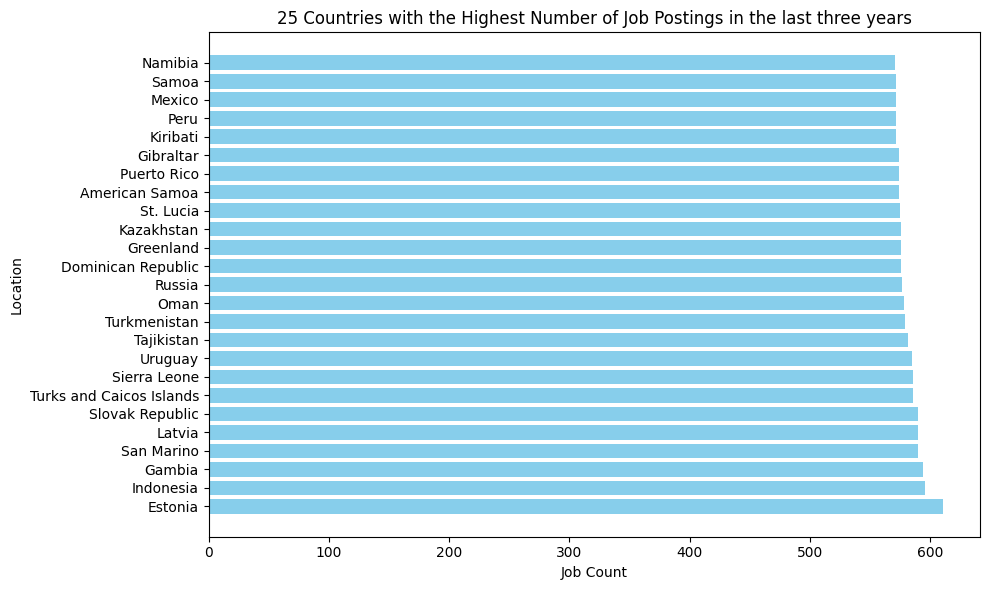

In [0]:
# Filtering for Top 25 countries
country_distribution = select_data.groupBy("Country").count().orderBy("count", ascending=False).limit(25)

# Convert PySpark DataFrame to Pandas DataFrame for plotting
country_pd = country_distribution.toPandas()

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(country_pd["Country"], country_pd["count"], color='skyblue')
plt.xlabel("Job Count")
plt.ylabel("Location")
plt.title("25 Countries with the Highest Number of Job Postings in the last three years")
plt.tight_layout()
plt.show()

**Findings:** Estonia indeed has the highest number of job postings among the top 25 countries listed, approaching 600 postings, while Namibia has the fewest among the top 25. This highlights Estonia as a significant hub for job opportunities in this dataset.


#### Qualifications Analysis:
- Distribution of qualifications across job titles or sectors.
- Most common qualifications required for different roles.
- We analyzed the distribution of qualifications across job titles to identify the educational requirements most in demand, helping organizations tailor their recruitment strategies and job seekers understand what qualifications enhance their employability.
- The below graph shows the qualifications that required by the industries for Data Engineers to Data Scientists.

In [0]:
qualifications_distribution = select_data.filter(col('Job Title').like('%Data%')).groupBy("Qualifications").count().orderBy("count", ascending=False).limit(25)

qualifications_pd = qualifications_distribution.toPandas()

# qualifications_pd.head()
plt.figure(figsize=(10, 6))

# Plotting qualifications
plt.barh(qualifications_pd["Qualifications"], qualifications_pd["count"], color='skyblue', label='Qualifications')

plt.xlabel("Count")
plt.ylabel("Qualifications")
plt.title("Distribution of Qualifications Across Job Titles")
plt.tight_layout()
plt.show()

**Findings:** The analysis shows that Bachelor's degrees like M.Com, B.Tech MCA are the most common qualifications listed, followed closely by master's degrees such as MBA and M.Tech, indicating a high demand for both undergraduate and graduate educational backgrounds in the job market

#### Skillset Analysis
- We chose to analyze the skillset distribution to identify the most sought-after skills in job profiles.

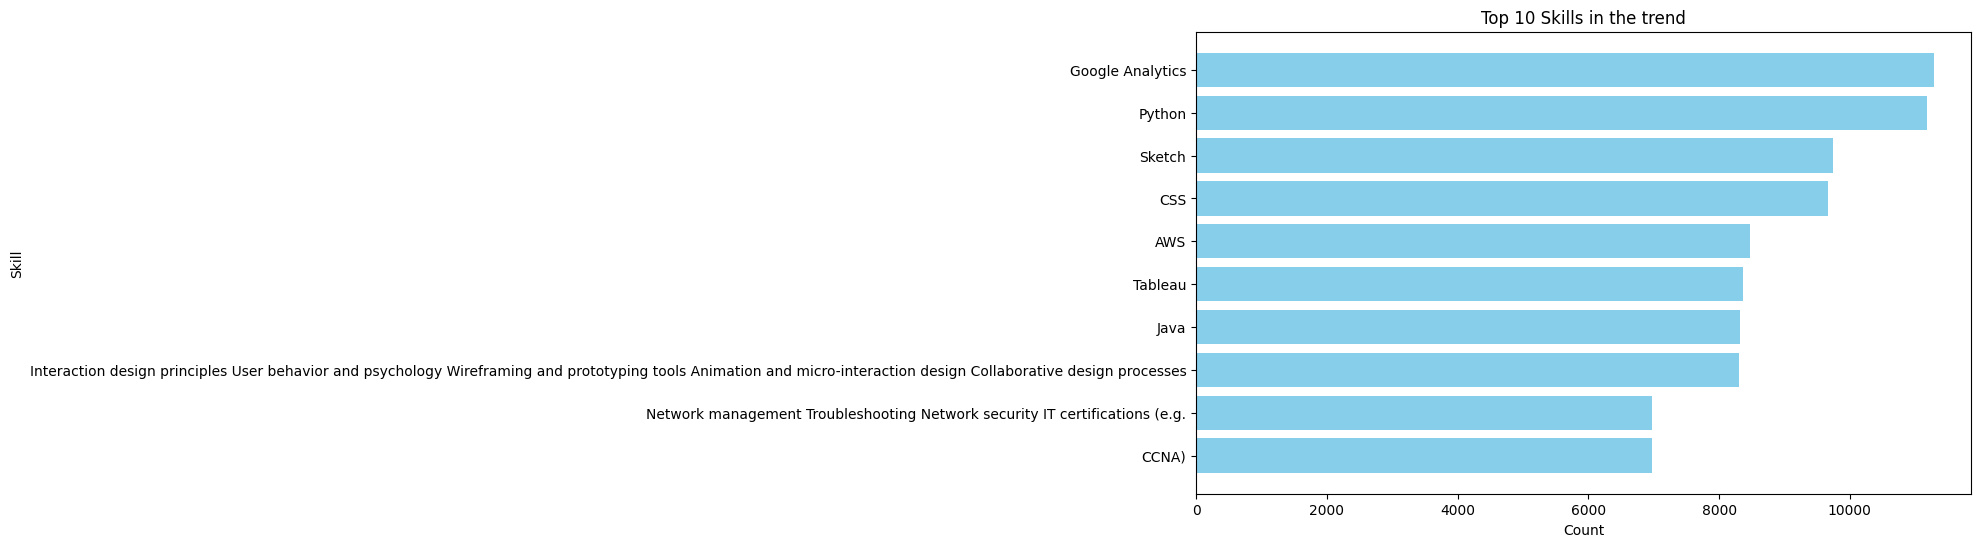

In [0]:
from pyspark.sql.functions import explode, split
# Assuming skills are listed in a single column separated by commas
skills_df = job.withColumn("Skill", explode(split(col("Skills"), ", ")))

# Count occurrences of each skill
skill_counts = skills_df.groupby("Skill").count().orderBy(col("count").desc())

skill_counts_pandas = skill_counts.toPandas()

# Extracting data for visualization
top_skills = skill_counts_pandas["Skill"].head(10)
skill_counts = skill_counts_pandas["count"].head(10)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_skills, skill_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 10 Skills in the trend')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

**Findings:** It indicates there is a high demand for technical skills like Python, Java, and AWS, along with proficiency in tools like Google Analytics and Tableau.

#### Job Posting Date Trends:
- Trends in job postings over time (monthly, quarterly, yearly).
- Seasonal variations in job availability.
- We analyzed job posting trends over time to identify seasonal variations and annual fluctuations in job availability, which assists businesses in strategic planning and job seekers in timing their applications effectively.

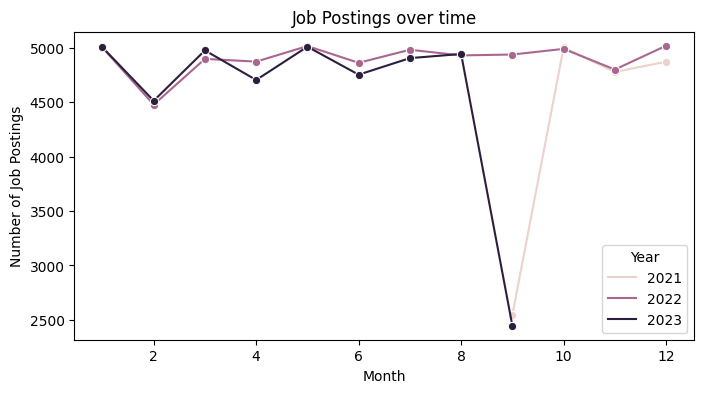

In [0]:
time_trends = select_data.withColumn("Year", year("Job Posting Date")).withColumn("Month", month("Job Posting Date")).withColumn("Day", dayofmonth("Job Posting Date")).withColumn("Quarter", quarter("Job Posting Date"))

time_year_month = (time_trends.groupBy('Year', 'Month').count().orderBy("Year", "Month"))

# Convert to Pandas for visualization
time_year_month_pd = time_year_month.toPandas()

# Set the figure size
plt.figure(figsize=(8, 4))

# Plot the graph
sns.lineplot(data=time_year_month_pd, x="Month", y="count", hue="Year", marker='o')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings over time')

# Show the legend
plt.legend(title='Year', loc='lower right')

# Show the plot
plt.show()

**Findings:** The line chart illustrates a significant fluctuation in job postings, with a noticeable dip in November 2021 and 2023 followed by a steady recovery in 2021, suggesting seasonal impacts and possibly economic factors influencing job market dynamics.

#### Seasonal Variations in the Job 
- We analyzed job postings by month and quarter to discern any seasonal trends or quarterly patterns in job availability, aiding in strategic planning for hiring cycles and job seeking.

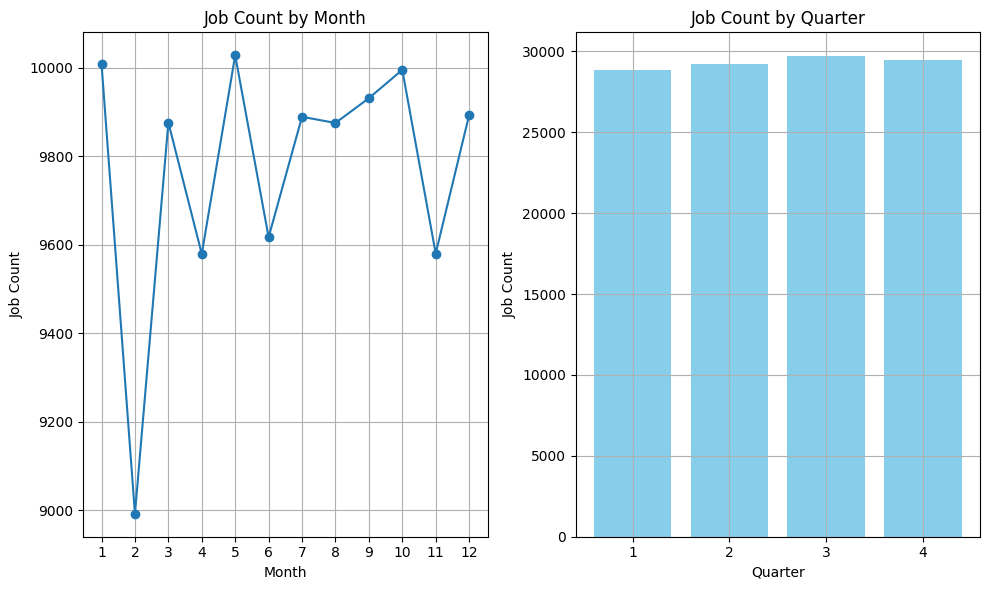

In [0]:
# Count job postings by month and quarter
job_count_by_month = time_trends.groupBy("Month").count().orderBy("Month")
job_count_by_quarter = time_trends.groupBy("Quarter").count().orderBy("Quarter")

# Convert PySpark DataFrame to Pandas DataFrame for plotting
month_pd = job_count_by_month.toPandas()
quarter_pd = job_count_by_quarter.toPandas()
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))

# Line plot for job count by month
plt.subplot(1, 2, 1)
plt.plot(month_pd["Month"], month_pd["count"], marker='o')
plt.xlabel("Month")
plt.ylabel("Job Count")
plt.title("Job Count by Month")
plt.xticks(range(1, 13))  # Assuming month numbers range from 1 to 12
plt.grid(True)

# Bar plot for job count by quarter
plt.subplot(1, 2, 2)
plt.bar(quarter_pd["Quarter"], quarter_pd["count"], color='skyblue')
plt.xlabel("Quarter")
plt.ylabel("Job Count")
plt.title("Job Count by Quarter")
plt.xticks(range(1, 5))  # Assuming quarter numbers range from 1 to 4
plt.grid(True)

plt.tight_layout()
plt.show()

**Findings:** The line and bar charts reveal significant seasonal fluctuations, with peaks and troughs indicating varying job availability across different times of the year, pointing to potential strategic times for hiring and job application activities.

#### Company Size Insights:
- Distribution of job postings by company size categories
- Relationship between company size and offered roles or salaries.
- We categorized and analyzed job postings by company size to explore how the scale of a company influences the types of roles offered and the salaries associated with these positions.


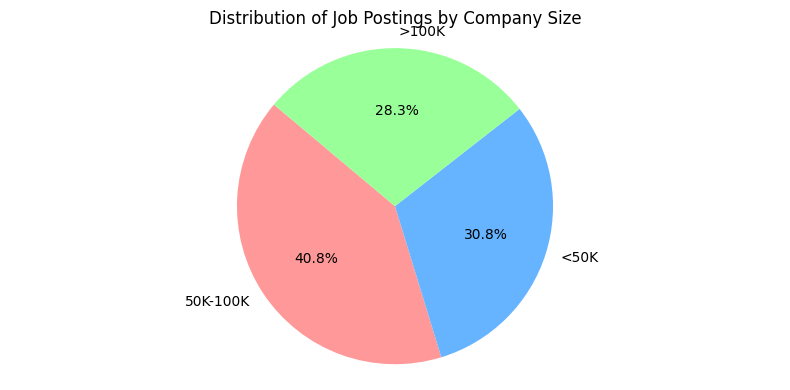

In [0]:
# Create a new column 'Category' based on conditions using case statements
company_class = select_data.withColumn("company_size_class", when(select_data["Company Size"] < 50000, "<50K")
    .when((select_data["Company Size"] >= 50000) & (select_data["Company Size"] <= 100000), "50K-100K")
    .otherwise(">100K")
)

# Group by company size categories and count job postings
size_distribution = company_class.groupBy("company_size_class").count().orderBy("company_size_class")
# Convert PySpark DataFrame to Pandas DataFrame for plotting
size_pd = size_distribution.toPandas()

colors = ['#ff9999', '#66b3ff', '#99ff99']
# Plotting using Matplotlib
plt.figure(figsize=(8, 4))

plt.title("Distribution of Job Postings by Company Size")
plt.pie(size_pd["count"], labels=size_pd["company_size_class"], colors = colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
# display(company_class)

**Findings:** The pie chart displays a balanced distribution among different company sizes, with companies having employees in the range of 50,000 and 1,00,000 making up the largest segment at 40.8%, indicating a diverse job market that spans small, medium, and large enterprises.

#### Disribution of salaries across company size categories
- We analyzed the distribution of minimum and maximum salaries across different company size categories to understand how company scale impacts compensation in various roles.

Text(0.5, 1.0, 'Distribution of Minimum Salary')

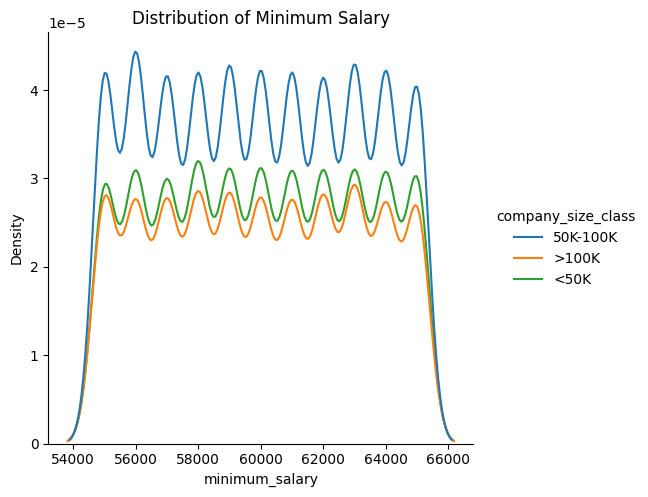

In [0]:
col_list = ['minimum_salary', 'maximum_salary']
salary_dist = company_class.orderBy(*col_list, ascending= False).select('company_size_class', 'minimum_salary', 'maximum_salary')
salary_dist_pd = salary_dist.toPandas()

# Minimum salary disribution
sns.displot(data=salary_dist_pd,x="minimum_salary", hue="company_size_class", kind="kde")
plt.title('Distribution of Minimum Salary')

Text(0.5, 1.0, 'Distribution of Maximum Salary')

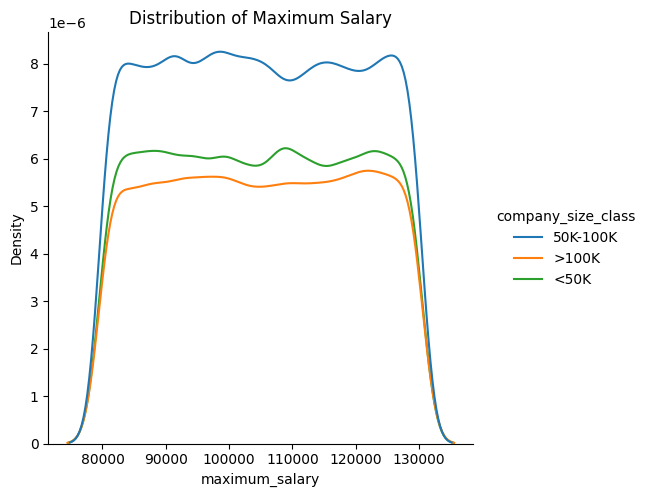

In [0]:
# Maximum salary disribution

sns.displot(salary_dist_pd, x="maximum_salary", hue="company_size_class", kind="kde")
plt.title('Distribution of Maximum Salary')

**Findings:** The kernel density estimation plots indicate that larger companies generally offer a higher range of maximum salaries compared to smaller firms, while the spread of minimum salaries is fairly consistent across all company sizes, suggesting a standard baseline salary that increases with company size for maximum compensation offers.

#### Average Salary Comparision between various roles

In [0]:
# salary_avg = select_data.groupBy('Job Title').agg(avg('minimum_salary').alias('Average Minimum Salary'))
salary_compare1 = time_trends.filter((col('Job Title')=='Data Engineer') | (col('Job Title')=='Data Analyst') | \
                                     (col('Job Title')=='Data Scientist')).filter((col('year')=='2021') | (col('year')=='2022'))
# display(salary_compare)

time_year_month = (salary_compare1.groupBy('Job Title','Month').agg(avg('minimum_salary').alias('Average Minimum Salary')).orderBy("Month"))

# Convert to Pandas for visualization
time_year_month_pd = time_year_month.toPandas()

# Set the figure size
plt.figure(figsize=(8, 4))

# Plot the graph
sns.lineplot(data=time_year_month_pd, x="Month", y="Average Minimum Salary", hue="Job Title", marker='o')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Salary')
plt.title('Salaries of different roles Over Time')

# Show the legend
plt.legend(title='Job Title', loc='upper right')

# Show the plot
plt.show()

**Findings:** The above line graph describes the change in average salaries of different jobs over time

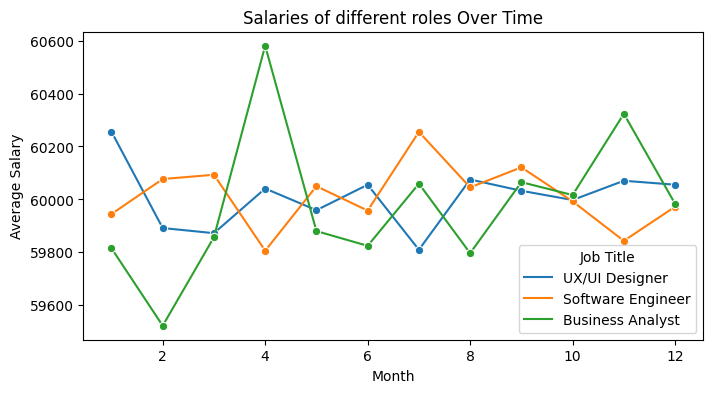

In [0]:
# salary_avg = select_data.groupBy('Job Title').agg(avg('minimum_salary').alias('Average Minimum Salary'))
salary_compare2 = time_trends.filter((col('Job Title')=='Business Analyst') | \
                                     (col('Job Title')=='Software Engineer') | (col('Job Title')=='UX/UI Designer')).filter((col('year')=='2021') | (col('year')=='2022'))
# display(salary_compare)

time_year_month2 = (salary_compare2.groupBy('Job Title','Month').agg(avg('minimum_salary').alias('Average Minimum Salary')).orderBy("Month"))

# Convert to Pandas for visualization
time_year_month2_pd = time_year_month2.toPandas()

# Set the figure size
plt.figure(figsize=(8, 4))

# Plot the graph
sns.lineplot(data=time_year_month2_pd, x="Month", y="Average Minimum Salary", hue="Job Title", marker='o')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Salary')
plt.title('Salaries of different roles Over Time')

# Show the legend
plt.legend(title='Job Title', loc='lower right')

# Show the plot
plt.show()

**Findings:** The above line graph describes the change in average salaries of different jobs over time

### Correlation Analysis between Experience and Salary
- We explore the relationship between average years of experience and average salary to understand how professional experience influences compensation within various job roles. 
- By calculating the correlation between these two variables, we aim to highlight potential trends and insights that can inform both employers and job seekers about the value of experience in the job market.

<Axes: title={'center': 'Correlation Analysis between Salary and Experience'}>

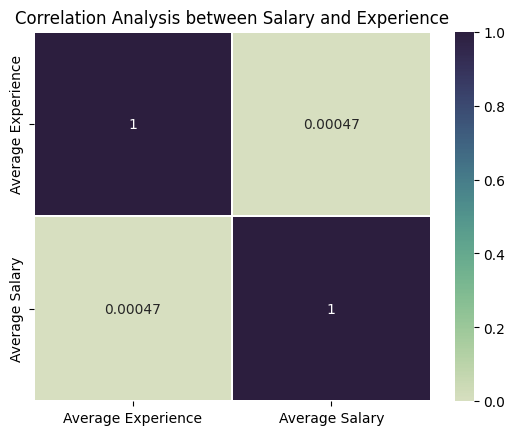

In [0]:
correlation = time_trends.withColumn('Average Experience', (col('minimum_experience') +  col('maximum_experience'))/2).withColumn('Average Salary', (col('minimum_salary') +  col('maximum_salary'))/2).select('Average Experience', 'Average Salary')

correlation_pd = correlation.toPandas()
colormap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
plt.title('Correlation Analysis between Salary and Experience')
sns.heatmap(correlation_pd.corr().abs(),  annot=True, cmap=colormap, linewidths=0.2, vmin=0, vmax=1)

**Findings:** 
The correlation analysis between average salary and average experience reveals a very low correlation coefficient of 0.00047, indicating that there is virtually no linear relationship between years of experience and salary levels in the dataset analyzed

### Distribution of Work Types
- We examine the distribution of various work types within the job market to understand the prevalence of different employment arrangements such as full-time, part-time, contract, and temporary roles. 
- This visualization helps identify trends in employment types, offering insights into the flexibility and diversity of job opportunities available to job seekers

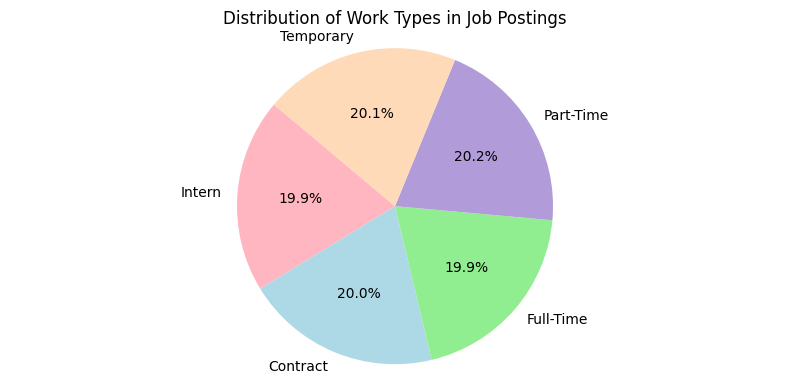

In [0]:
work_type = select_data.groupby('Work Type').agg(count('Work Type').alias('count'))

work_type_pd = work_type.toPandas()


 
colors = ['#FFB6C1', '#ADD8E6', '#90EE90', '#B19CD9', '#FFDAB9']
# Plotting using Matplotlib
plt.figure(figsize=(8, 4))

plt.title("Distribution of Work Types in Job Postings")
plt.pie(work_type_pd["count"], labels=work_type_pd["Work Type"], colors = colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
# display(company_class)

**Findings:** The pie chart reveals a remarkably even distribution among different work types, with full-time, part-time, temporary, intern, and contract roles each comprising around 20% of job postings.

#### Analysis on Top 25 postings Job roles
- We identify the top 25 job roles with the highest number of postings to understand which positions are most in demand in the current job market. 
- This visualization provides a clear view of the job titles that employers are most actively seeking to fill, highlighting key trends and opportunities for job seekers.

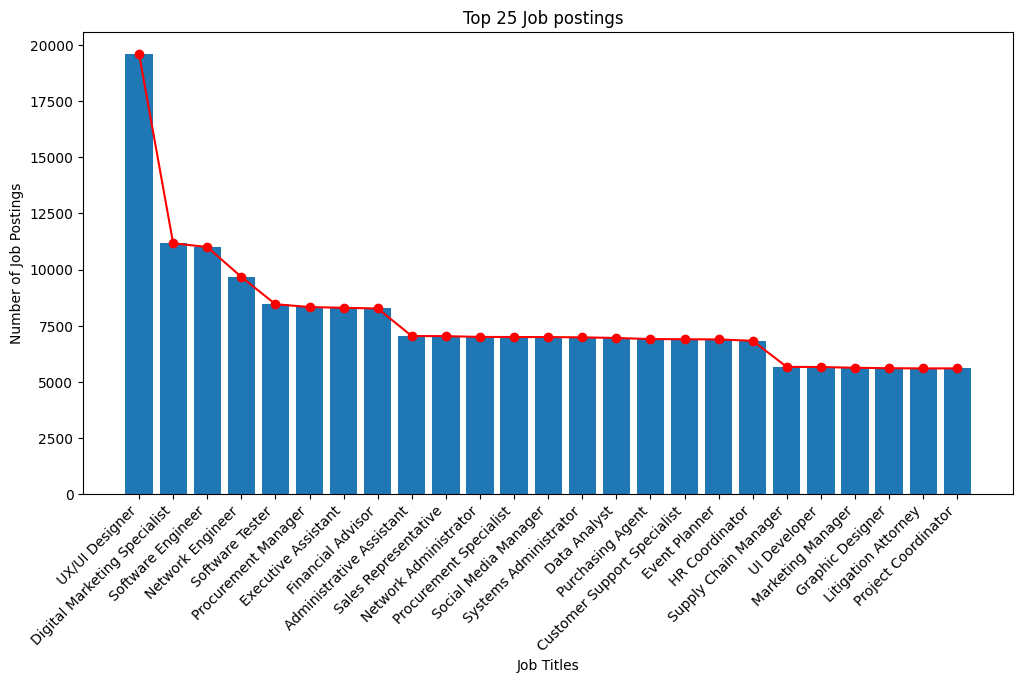

In [0]:
job25 = chng_datatype.groupby('Job Title').count().orderBy("count", ascending=False).limit(25)
# Convert to Pandas DataFrame
job25_pd = job25.toPandas()

# Plot the graph for the top 25 jobs
plt.figure(figsize=(12, 6))
plt.bar(job25_pd['Job Title'], job25_pd['count'])

# Draw a line touching the tops of the bars
plt.plot(
    job25_pd['Job Title'], 
    job25_pd['count'], 
    marker='o', 
    linestyle='-', 
    color='r',  
    label='Line on Top'
)

plt.title('Top 25 Job postings  ')
plt.xlabel('Job Titles')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

**Findings:** The bar chart indicates that the most numerous job postings are concentrated in roles like UX/UI Designer and Software Engineer, with a gradual decrease in postings for other roles as the list progresses

#### Anaysis on Top 25 postings Job roles in USA
- This analysis focuses on identifying the top 25 job roles with the highest number of postings in the USA, providing insights into the most in-demand professions. 
- By examining these trends, we can better understand the job market landscape and the sectors driving employment opportunities in the United States.

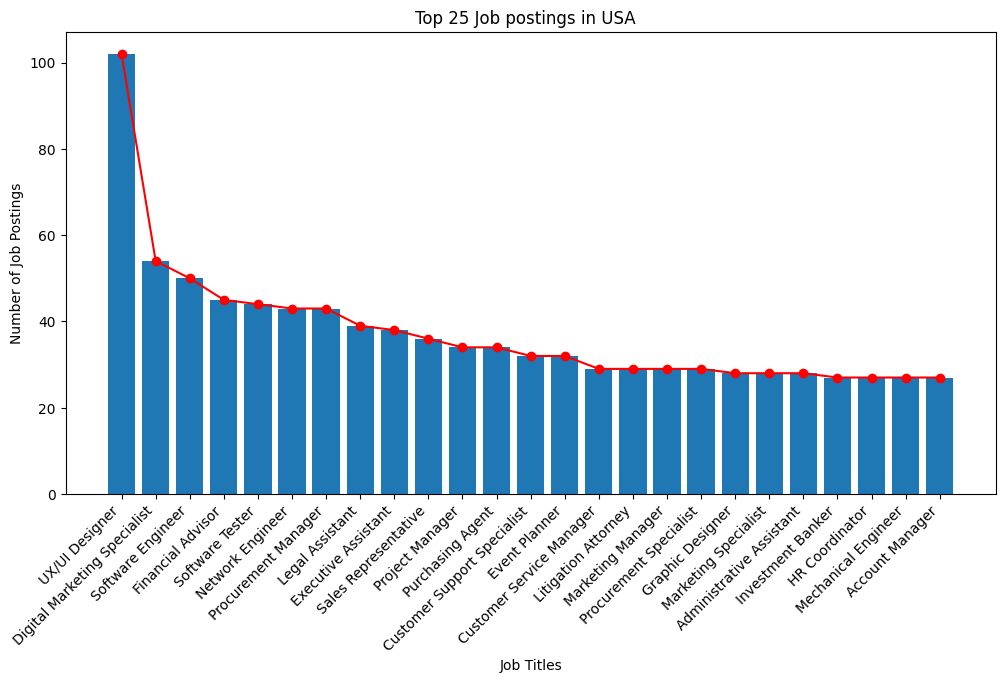

In [0]:
usa25 = chng_datatype.filter(col('Country')=='USA').groupby('Job Title').count().orderBy("count", ascending=False).limit(25)

# Convert to Pandas DataFrame
usa25_pd = usa25.toPandas()

# Plot the graph for the top 25 jobs
plt.figure(figsize=(12, 6))
plt.bar(usa25_pd['Job Title'], usa25_pd['count'])

# Draw a line touching the tops of the bars
plt.plot(
    usa25_pd['Job Title'], 
    usa25_pd['count'], 
    marker='o', 
    linestyle='-', 
    color='r',  
    label='Line on Top'
)

plt.title('Top 25 Job postings in USA  ')
plt.xlabel('Job Titles')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

**Findings:** The data shows a significant concentration in a few job roles, with the majority of postings for UX/UI Designers and Digital Marketing Specialists, followed by a gradual decline across other professions in the USA.

## Machine Learning (Job recommendations using skillset)


In [0]:
# UX/UI, Data, IT, Business Analyst, Web, Java, Network, Software
data_select = job_cleaned.filter(col('Job Title').like('%Data%') | col('Job Title').like('%Software%') | col('Job Title').like('%UX/UI%') | col('Job Title').like('%Business Analyst%')  | col('Job Title').like('%Web%')  | col('Job Title').like('%IT%')| col('Job Title').like('%Java%') | col('Job Title').like('%Network%')| col('Job Title').like('%Software%')).select('Job Id', 'Job Title', 'Role', 'Job Description', 'skills', 'Responsibilities', 'Company', 'Job Posting Date', 'City', 'State')

display(data_select)

In [0]:
data_select.printSchema()

root
 |-- Job Id: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Role: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- skills: string (nullable = true)
 |-- Responsibilities: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Job Posting Date: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)



### K-Means Clustering

#### Feature Engineering

In [0]:
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml import Pipeline

# Initialize Tokenizer
tokenizer = Tokenizer(inputCol="skills", outputCol="tokens")

# Apply HashingTF
hashingTF = HashingTF(inputCol="tokens", outputCol="rawFeatures", numFeatures=100)

# Compute the IDF model
idf = IDF(inputCol="rawFeatures", outputCol="features")

# Set up the Pipeline
pipeline = Pipeline(stages=[tokenizer, hashingTF, idf])

# Fit the pipeline to the dataset
pipeline_model = pipeline.fit(data_select)
result = pipeline_model.transform(data_select)


#### K-means modelling

In [0]:
from pyspark.ml.clustering import KMeans
# Number of clusters can be determined experimentally
kmeans = KMeans(featuresCol="features", k=30)
kmeans_model = kmeans.fit(result)
clusters = kmeans_model.transform(result)

In [0]:

def cosine_similarity(broadcast_user_features):
    '''
    Defining cosine similarity function which takes transformed input features as an input and gives similarity score
    '''
    def _cosine_similarity(features):
        user_features = broadcast_user_features.value.toArray()
        features_array = features.toArray()
        return float(np.dot(user_features, features_array) / (np.linalg.norm(user_features) * np.linalg.norm(features_array)))
    return _cosine_similarity

#### Sample user input function for testing

In [0]:
# Broadcasting user features
def recommend_jobs(user_skills):
    '''
    This function takes user input (skills) and gives list of recommended jobs from the job database using similarity as a metric.
    '''
    user_df = spark.createDataFrame([(user_skills,)], ["skills"])
    user_features_df = pipeline_model.transform(user_df)

    # Extract user features
    user_features = user_features_df.select("features").collect()[0]["features"]
    broadcast_user_features = spark.sparkContext.broadcast(user_features)

    # Apply the UDF with the broadcast variable
    cosine_similarity_udf = udf(cosine_similarity(broadcast_user_features), FloatType())

    # Calculate similarities
    result_df = clusters.withColumn("similarity", cosine_similarity_udf("features"))
    return result_df.orderBy("similarity", ascending=False)

#### User Input

In [0]:
# Model Prediction (Example)
input_skill = "Structured Query Language"
list_jobs = recommend_jobs(input_skill)

##### Recommendations

In [0]:
# Filtering the job that are most suitable for the skillset
recommended_jobpostings = list_jobs.filter(col('similarity')>=0.3)
display(recommended_jobpostings)

Job Id Job Title Role Job Description skills Responsibilities Company Job Posting Date City State tokens rawFeatures features prediction similarity 1.583265199533564E15 Business Analyst Healthcare Business Analyst Healthcare Business Analysts work in the healthcare industry, analyzing data and processes to improve healthcare delivery. They collaborate with healthcare professionals and IT teams to optimize systems and workflows. Healthcare industry knowledge Health data analysis HIPAA regulations EMR systems Work in the healthcare sector, analyzing healthcare data and processes to improve patient care and operational efficiency. Identify opportunities for process improvement and cost reduction. Collaborate with healthcare professionals and stakeholders. Unilever 2023-01-16 """""State"""":""""N/A""""" """""Zip"""":""""N/A""""" List(healthcare, industry, knowledge, health, data, analysis, hipaa, regulations, emr, systems) Map(vectorType -> sparse, length -> 100, indices -> List(5, 10, 16, 28, 31, 63, 64, 89, 95, 96), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)) Map(vectorType -> sparse, length -> 100, indices -> List(5, 10, 16, 28, 31, 63, 64, 89, 95, 96), values -> List(2.8431031296007956, 3.7398209278258805, 3.350032011952729, 1.3843519181434505, 4.44742967639766, 1.388582418124241, 1.7943723764194863, 1.7209535336440822, 0.7723559362545929, 1.2899180038324065)) 9 0.31662643 2.282777298683319E15 Business Analyst Healthcare Business Analyst Healthcare Business Analysts work in the healthcare industry, analyzing data and processes to improve healthcare delivery. They collaborate with healthcare professionals and IT teams to optimize systems and workflows. Healthcare industry knowledge Health data analysis HIPAA regulations EMR systems Work in the healthcare sector, analyzing healthcare data and processes to improve patient care and operational efficiency. Identify opportunities for process improvement and cost reduction. Collaborate with healthcare professionals and stakeholders. Brambles Limited 2022-07-16 """""State"""":""""NSW""""" """""Zip"""":""""2000""""" List(healthcare, industry, knowledge, health, data, analysis, hipaa, regulations, emr, systems) Map(vectorType -> sparse, length -> 100, indices -> List(5, 10, 16, 28, 31, 63, 64, 89, 95, 96), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)) Map(vectorType -> sparse, length -> 100, indices -> List(5, 10, 16, 28, 31, 63, 64, 89, 95, 96), values -> List(2.8431031296007956, 3.7398209278258805, 3.350032011952729, 1.3843519181434505, 4.44742967639766, 1.388582418124241, 1.7943723764194863, 1.7209535336440822, 0.7723559362545929, 1.2899180038324065)) 9 0.31662643 2.468170352370766E15 Business Analyst Healthcare Business Analyst Healthcare Business Analysts work in the healthcare industry, analyzing data and processes to improve healthcare delivery. They collaborate with healthcare professionals and IT teams to optimize systems and workflows. Healthcare industry knowledge Health data analysis HIPAA regulations EMR systems Work in the healthcare sector, analyzing healthcare data and processes to improve patient care and operational efficiency. Identify opportunities for process improvement and cost reduction. Collaborate with healthcare professionals and stakeholders. Etsy, Inc. 2022-02-01 """""State"""":""""NY""""" """""Zip"""":""""11201""""" List(healthcare, industry, knowledge, health, data, analysis, hipaa, regulations, emr, systems) Map(vectorType -> sparse, length -> 100, indices -> List(5, 10, 16, 28, 31, 63, 64, 89, 95, 96), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)) Map(vectorType -> sparse, length -> 100, indices -> List(5, 10, 16, 28, 31, 63, 64, 89, 95, 96), values -> List(2.8431031296007956, 3.7398209278258805, 3.350032011952729, 1.3843519181434505, 4.44742967639766, 1.388582418124241, 1.7943723764194863, 1.7209535336440822, 0.7723559362545929, 1.2899180038324065)) 9 0.31662643 2.289737695961124E15 Business 

###Using PCA for Visualization:

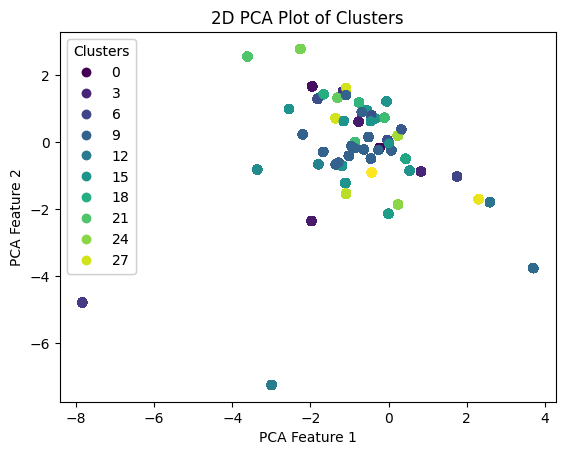

In [0]:
from pyspark.ml.feature import PCA

# Apply PCA
pca = PCA(k=2, inputCol='features', outputCol='pcaFeatures')
pca_model = pca.fit(clusters)
pca_result = pca_model.transform(clusters)

# Extract the PCA features and the cluster assignments for plotting
pandas_df = pca_result.select("pcaFeatures", "prediction").toPandas()

import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots()
scatter = ax.scatter(
    pandas_df['pcaFeatures'].apply(lambda x: x[0]),  # X-axis - first principal component
    pandas_df['pcaFeatures'].apply(lambda x: x[1]),  # Y-axis - second principal component
    c=pandas_df['prediction'],  # Color by cluster
    cmap='viridis'  # Color map to use
)

# Create a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Add labels and title
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_title('2D PCA Plot of Clusters')

# Show the plot
plt.show()


#### Model Output

In [0]:
display(recommended_jobpostings.select('Job Id', 'Role', 'Job Description', 'skills', 'Responsibilities', 'Company', 'Job Posting Date', 'City', 'State'))

Job Id Role Job Description skills Responsibilities Company Job Posting Date City State 1.094107110870806E15 Healthcare Business Analyst Healthcare Business Analysts work in the healthcare industry, analyzing data and processes to improve healthcare delivery. They collaborate with healthcare professionals and IT teams to optimize systems and workflows. Healthcare industry knowledge Health data analysis HIPAA regulations EMR systems Work in the healthcare sector, analyzing healthcare data and processes to improve patient care and operational efficiency. Identify opportunities for process improvement and cost reduction. Collaborate with healthcare professionals and stakeholders. China Telecom 2022-10-28 """""State"""":""""Beijing""""" """""Zip"""":""""100033""""" 2.282777298683319E15 Healthcare Business Analyst Healthcare Business Analysts work in the healthcare industry, analyzing data and processes to improve healthcare delivery. They collaborate with healthcare professionals and IT teams to optimize systems and workflows. Healthcare industry knowledge Health data analysis HIPAA regulations EMR systems Work in the healthcare sector, analyzing healthcare data and processes to improve patient care and operational efficiency. Identify opportunities for process improvement and cost reduction. Collaborate with healthcare professionals and stakeholders. Brambles Limited 2022-07-16 """""State"""":""""NSW""""" """""Zip"""":""""2000""""" 2.870579161091057E15 Healthcare Business Analyst Healthcare Business Analysts work in the healthcare industry, analyzing data and processes to improve healthcare delivery. They collaborate with healthcare professionals and IT teams to optimize systems and workflows. Healthcare industry knowledge Health data analysis HIPAA regulations EMR systems Work in the healthcare sector, analyzing healthcare data and processes to improve patient care and operational efficiency. Identify opportunities for process improvement and cost reduction. Collaborate with healthcare professionals and stakeholders. Cintas 2022-12-28 """""State"""":""""Ohio""""" """""Zip"""":""""45262""""" 2.289737695961124E15 Healthcare Business Analyst Healthcare Business Analysts work in the healthcare industry, analyzing data and processes to improve healthcare delivery. They collaborate with healthcare professionals and IT teams to optimize systems and workflows. Healthcare industry knowledge Health data analysis HIPAA regulations EMR systems Work in the healthcare sector, analyzing healthcare data and processes to improve patient care and operational efficiency. Identify opportunities for process improvement and cost reduction. Collaborate with healthcare professionals and stakeholders. Anheuser-Busch InBev SA/NV 2022-07-12 Belgium"""" """""State"""":""""N/A""""" 2.468170352370766E15 Healthcare Business Analyst Healthcare Business Analysts work in the healthcare industry, analyzing data and processes to improve healthcare delivery. They collaborate with healthcare professionals and IT teams to optimize systems and workflows. Healthcare industry knowledge Health data analysis HIPAA regulations EMR systems Work in the healthcare sector, analyzing healthcare data and processes to improve patient care and operational efficiency. Identify opportunities for process improvement and cost reduction. Collaborate with healthcare professionals and stakeholders. Etsy, Inc. 2022-02-01 """""State"""":""""NY""""" """""Zip"""":""""11201""""" 2.387808428014195E15 Healthcare Business Analyst Healthcare Business Analysts work in the healthcare industry, analyzing data and processes to improve healthcare delivery. They collaborate with healthcare professionals and IT teams to optimize systems and workflows. Healthcare industry knowledge Health data analysis HIPAA regulations EMR systems Work in the healthcare sector, analyzing healthcare data and processes to improve patient care and operational efficiency. Identify opportunities for process improvement and c

In [0]:
# Silhouette Score
from pyspark.ml.evaluation import ClusteringEvaluator

# Assuming 'clusters' is the DataFrame resulting from the K-means model, including the 'prediction' column
evaluator = ClusteringEvaluator(featuresCol='features', predictionCol='prediction', metricName='silhouette')

silhouette = evaluator.evaluate(clusters)
print(f"Silhouette with squared euclidean distance = {silhouette}")

Silhouette with squared euclidean distance = 0.5481096157307013


### Model  Evaluation
####Silhouette Score
The silhouette score is a popular metric for assessing the quality of clustering by K-means. It measures the similarity of an object to its own cluster compared to other clusters, providing a clear indication of how well each object has been classified. Below is the silhouette score achieved on clustering the model.

The K-means model has achieved silhouette score of 0.54 which is a good indication that clusters are apart.